### Homework assignment will go here: 

For 1d, 2d, and 3d:

- Calculate and plot $\sigma^2$ as a function of $n$. 
- Compute a linear fit of $\sigma^2$ as a function of $n$, and also plot that. 
- Compute the diffusion constant $D$ in each of 1d,2d,3d

In [209]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [210]:
import tf_setCPU

In [211]:
# setup walkers
nwalkers = 1000   # number of walkers
nsteps = 5000     # number of steps
n = np.arange(nsteps)   # a numpy array of steps
choices = [-1, 0, 1]   # choices given for each step

In [249]:
# define a function to get the average variance and the mean square displacement over the walkers
def sigma2(x):
    '''
    input position with a shape (steps, walkers,dimension), output sigma^2_n and r2
    '''
    x = tf.cast(x,dtype=float)
    x4 = tf.math.reduce_mean(x**4,axis=1)
    x2 = tf.math.reduce_mean(x**2,axis=1)
    sig2 = tf.math.sqrt(x4-x2**2)
    sigma2 = tf.math.reduce_sum(sig2,axis=1)
    r2 = tf.math.reduce_sum(x2,axis=1)
    return sigma2 ,r2


# 1-d

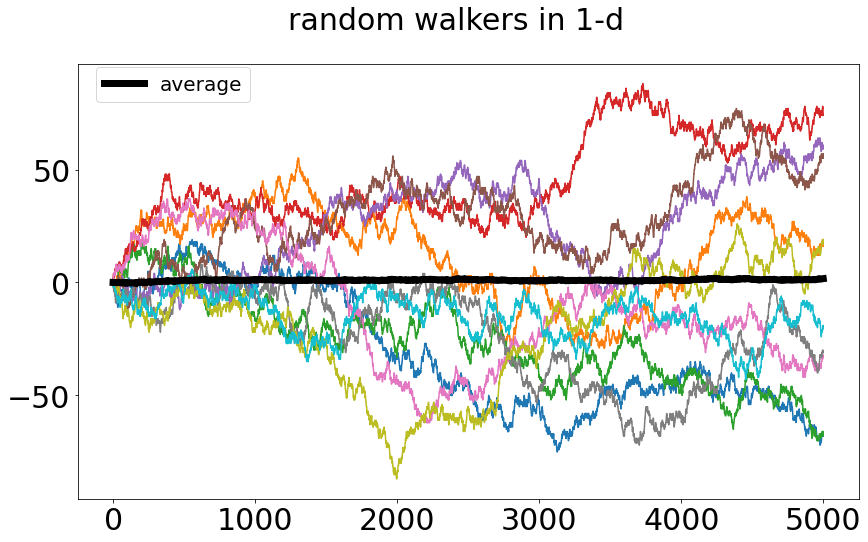

In [250]:
# use tf.random to simulate all step choices
steps1d = tf.random.uniform((nsteps,nwalkers,1),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x1d = tf.math.cumsum(steps1d,axis=0)

# check the first 10 walkers & average displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(x1d[:,:10,0])
ax.plot(tf.math.reduce_mean(tf.cast(x1d,dtype=float),axis=1),color='black',linewidth=7,label='average')
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 1-d',fontsize=30)
fig.legend(loc=(0.11,0.81),fontsize=20)
show()

# 2-d

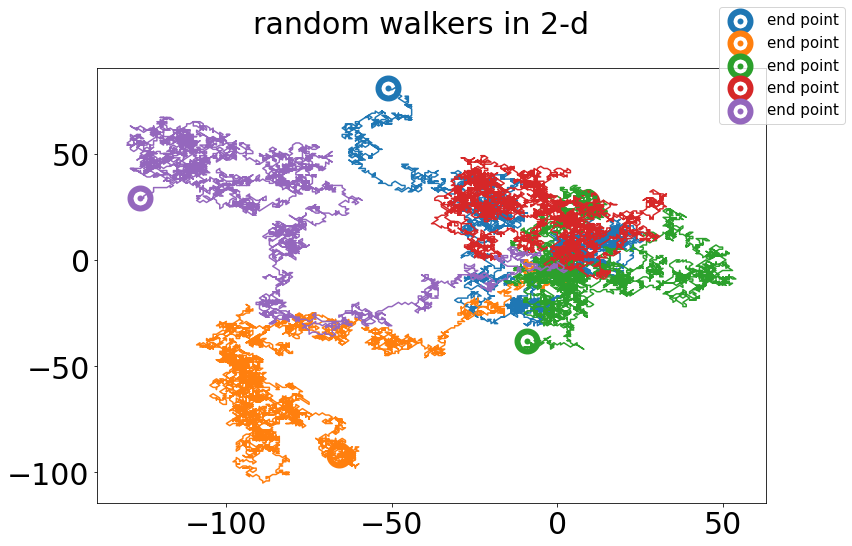

In [280]:
# use tf.random to simulate all step choices
steps2d = tf.random.uniform((nsteps,nwalkers,2),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x2d = tf.math.cumsum(steps2d,axis=0)

# check the first 5 walkers
fig, ax = plt.subplots(1,1,figsize=(12,8))
for i in np.arange(5):
    ax.scatter(x2d[-1,i,0],x2d[-1,i,1],marker='o',linewidth=20,label='end point')
ax.plot(x2d[:,:5,0],x2d[:,:5,1])
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 2-d',fontsize=30)
fig.legend(loc=1,fontsize=15)
show()

# 3-d

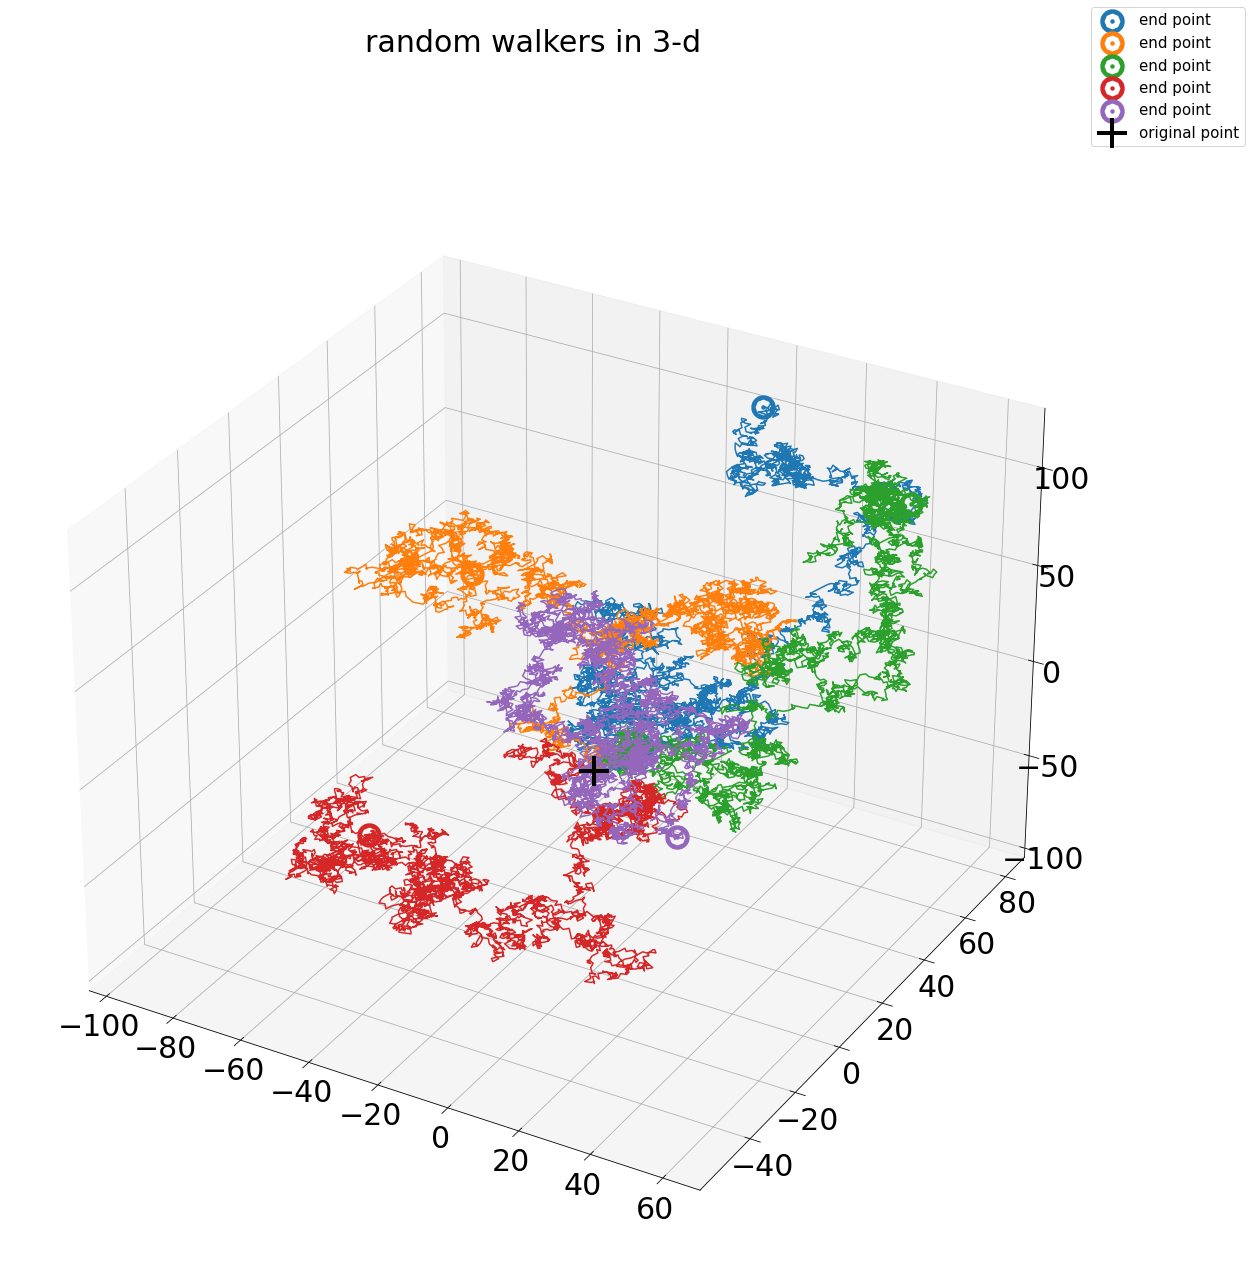

In [311]:
# use tf.random to simulate all step choices
steps3d = tf.random.uniform((nsteps,nwalkers,3),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x3d = tf.math.cumsum(steps3d,axis=0)

# check the first 5 walkers
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(5):
    ax.plot(x3d[:,i,0],x3d[:,i,1],x3d[:,i,2])
    ax.scatter(x3d[-1,i,0],x3d[-1,i,1],x3d[-1,i,2],marker='o',linewidth=20,label='end point')
ax.scatter(0,0,0,label='original point',marker='+',color='black',linewidth=30)
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 3-d',fontsize=30)
fig.legend(loc=1,fontsize=15)
show()

In [256]:
# get sigma^2,its fit and <xn^2>
sigma2_1d,xn2_1d = sigma2(x1d)
sigfit_1d = np.polyfit(n,sigma2_1d,1)
xn2fit_1d = np.polyfit(n,xn2_1d,1)

In [217]:
print('linear fit for sigma square: sigma^2 = {0:.2f}*n + {1:.2f}'.format(res1d[0],res1d[1]))

linear fit for sigma square: sigma^2 = 0.94*n + 5.11


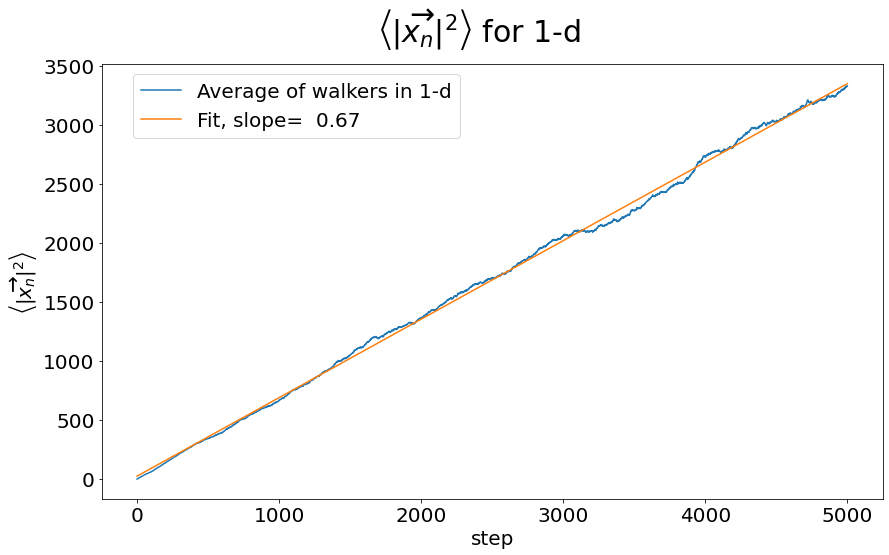

In [218]:
# Plot the mean displacement
fig, ax = plt.subplots(1,1,figsize=(12,8))
for i in np.arange(5):
    ax.scatter(x2d[-1,i],y2d[-1,i],marker='o',linewidth=10,label='end point')
ax.plot(x2d[:,:5],y2d[:,:5])
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 2-d',fontsize=30)
fig.legend(loc=1)
show()

We actually see the slope of $\left< {|\overrightarrow{x_n}|}^2 \right>$ is not close to 1. This is due to the three options we have [-1,0,1] here for each step. Thus, 
$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

$$
= 
\left< \sum_{i} s_i^2 \right> =[\frac{1}{3}(-1)^2 + \frac{1}{3}(0)^2 + \frac{1}{3}(1)^2] * n
$$
$$
= \frac{2}{3}n
$$

And the result we have (0.70) is close to the theoretical result 0.6667.

## Theoretical Result

One can solve the confusion equation combined with the boundary condition at infinite to get the solution P(x,t) and for any t, 
$$
P(x)dx = \frac{e^{-\frac{x^2}{4Dt}}}{\sqrt{4\pi Dt}}dx
$$
Then for 1, 2 and 3-d respectively,
$$
\left<x_n^2\right> = \int_{-\infty}^{\infty}P(x)x^2dx = 2Dt
$$

$$
\left<x_n^2+y_n^2\right> = \int_{-\infty}^{\infty}P(x)x^2dx +\int_{-\infty}^{\infty}P(y)y^2dy= 4Dt
$$

$$
\left<r^2\right> = \left<x_n^2+y_n^2+z_n^2\right> = 6Dt
$$

The confusion coefficient D, has a relation with the variance $\sigma^2$:
$$
\sigma^2 = 2Dt*d
$$

where d represents the dimension, while we're also expecting $\sigma^2=td$. Combining these two equations we can find that $D=\frac{1}{2}$ and it's independent on the dimension.

In [219]:
# use tf.random to simulate all step choices
steps2d = tf.random.uniform((nsteps,nwalkers,2),minval=-1,maxval=2,dtype=int64)

In [242]:
# sum all steps up to get the displacement
x2d = tf.math.cumsum(steps2d,axis=0)[:,:,0]
y2d = tf.math.cumsum(steps2d,axis=0)[:,:,1]
#r2d = tf.math.sqrt(tf.cast(x2d,dtype=float)**2+tf.cast(y2d,dtype=float)**2)


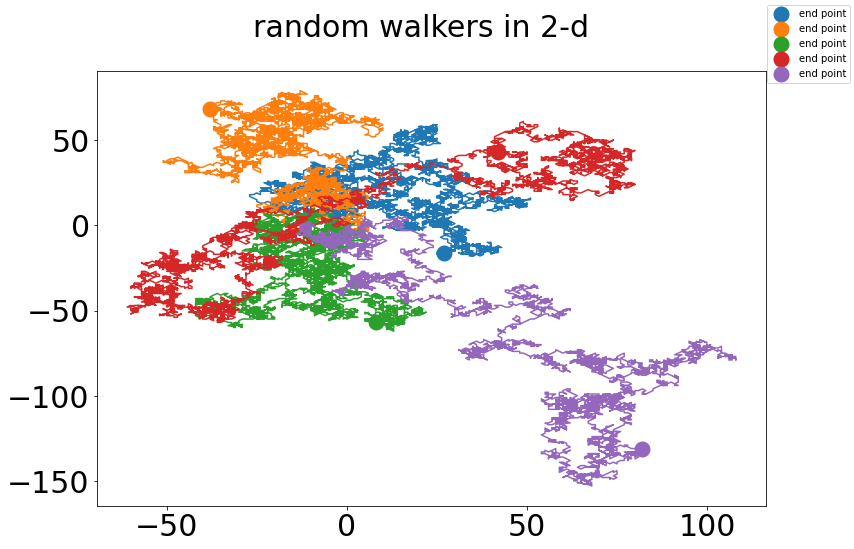

In [228]:
# check the first 5 walkers
fig, ax = plt.subplots(1,1,figsize=(12,8))
for i in np.arange(5):
    ax.scatter(x2d[-1,i],y2d[-1,i],marker='o',linewidth=10,label='end point')
ax.plot(x2d[:,:5],y2d[:,:5])
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 2-d',fontsize=30)
fig.legend(loc=1)
show()

In [229]:
# Now get the average variance over the walkers
sigma2d =tf.math.sqrt(
    tf.math.reduce_mean(r2d**4,axis=1)
        -
        (tf.math.reduce_mean(r2d**2,axis=1))**2
    )

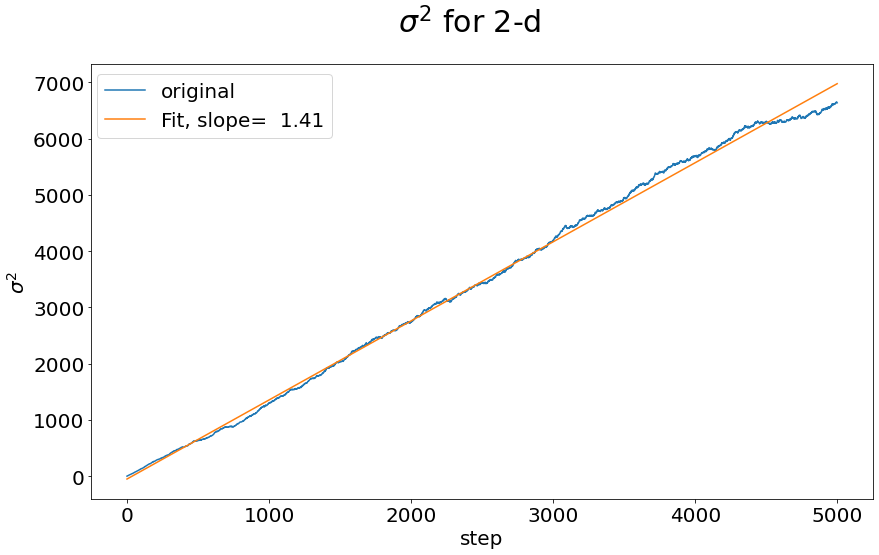

In [230]:
# plot it as a function of n and the fit function
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(sigma2d,label='original')
res2d = np.polyfit(n,sigma2d,1)
ax.plot(res2d[0]*n+res2d[1],label='Fit, slope=%6.2f' % res2d[0])
fig.suptitle(r'$\sigma^2$ for 2-d',fontsize=30) 
fig.legend(loc=(0.11,0.75),fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
show()

In [231]:
print('linear fit for sigma square: sigma^2 = {0:.2f}*n + {1:.2f}'.format(res2d[0],res2d[1]))

linear fit for sigma square: sigma^2 = 1.41*n + -50.32


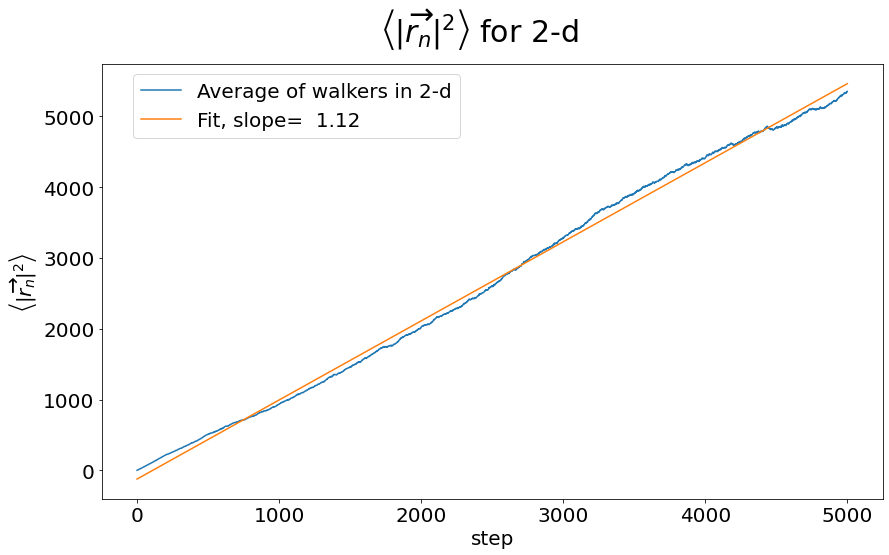

In [232]:
# Plot the mean displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
r2_2d=tf.math.reduce_mean(r2d,axis=1)**2
ax.plot(r2_2d ,  label='Average of walkers in 2-d' )
r2_2dfit = np.polyfit(n, r2_2d,1 )
ax.plot( n, r2_2dfit[0]*n + r2_2dfit[1], label='Fit, slope=%6.2f' % r2_2dfit[0] )
ax.tick_params(axis='both',labelsize=20)
fig.suptitle(r"$\left< {|\overrightarrow{r_n}|}^2 \right>$ for 2-d",fontsize=30)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\left< {|\overrightarrow{r_n}|}^2 \right>$",fontsize=20)
fig.legend(loc=(0.15,0.75),fontsize=20)
show()

In [235]:
# use tf.random to simulate all step choices
steps3d = tf.random.uniform((nsteps,nwalkers,3),minval=-1,maxval=2,dtype=int64)

In [239]:
# sum all steps up to get the displacement
x3d = tf.math.cumsum(steps3d,axis=0)[:,:,0]
y3d = tf.math.cumsum(steps3d,axis=0)[:,:,1]
z3d = tf.math.cumsum(steps3d,axis=0)[:,:,2]

r3d = tf.math.sqrt(tf.cast(x3d,dtype=float)**2+tf.cast(y3d,dtype=float)**2+tf.cast(z3d,dtype=float)**2)


In [240]:
# Now get the average variance over the walkers
sigma3d =tf.math.sqrt(
    tf.math.reduce_mean(r3d**4,axis=1)
        -
        (tf.math.reduce_mean(r3d**2,axis=1))**2
    )

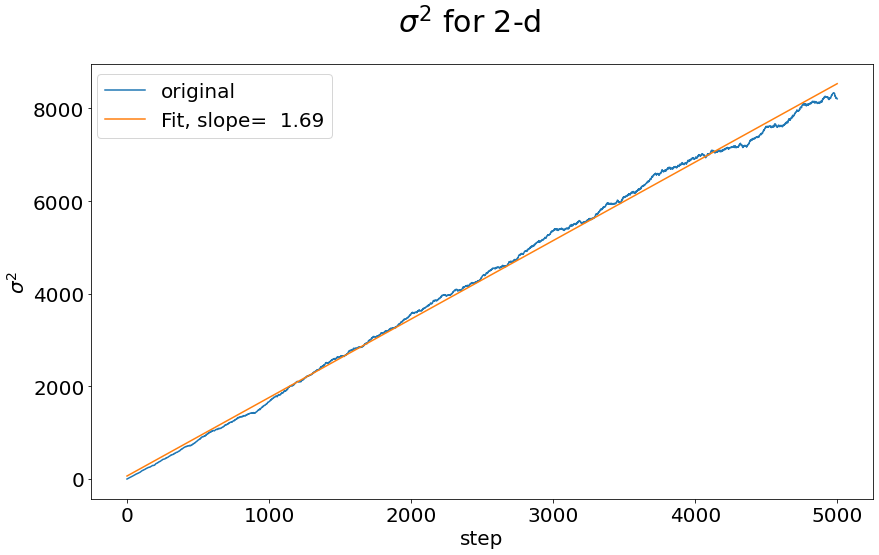

In [241]:
# plot it as a function of n and the fit function
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(sigma3d,label='original')
res3d = np.polyfit(n,sigma3d,1)
ax.plot(res3d[0]*n+res3d[1],label='Fit, slope=%6.2f' % res3d[0])
fig.suptitle(r'$\sigma^2$ for 2-d',fontsize=30) 
fig.legend(loc=(0.11,0.75),fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
show()